<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532    

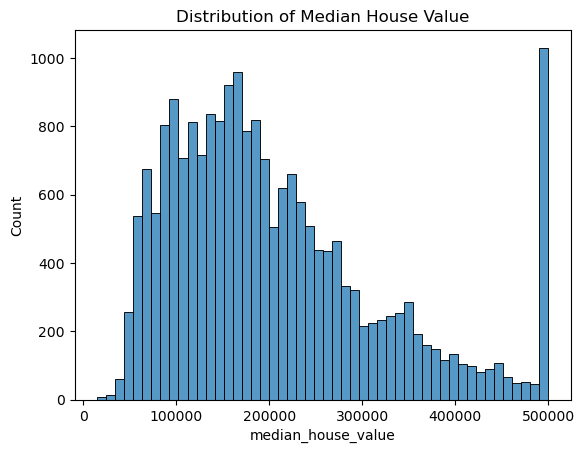

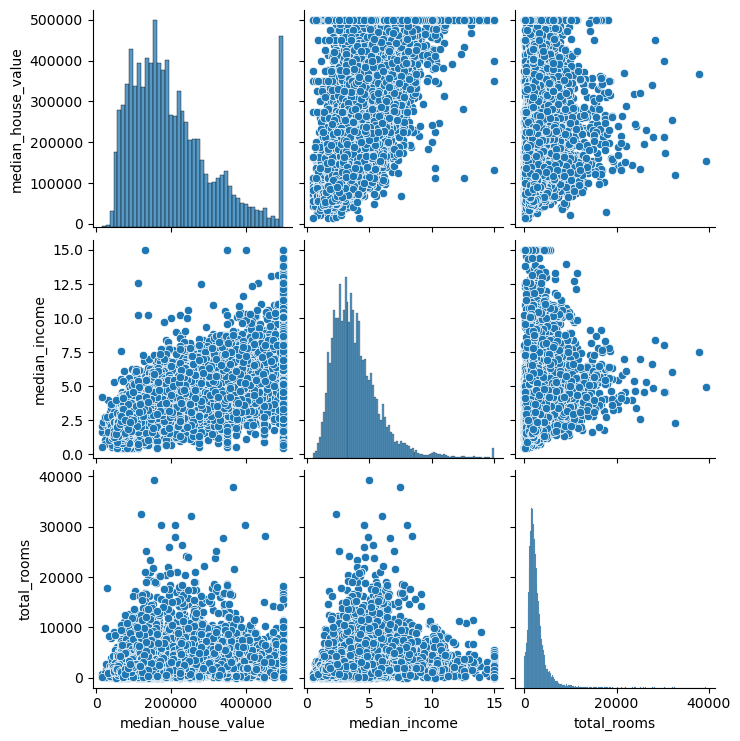

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Data_file - data_file.csv')
print(df.info())
print(df.describe())
print(df.isnull().sum())  # Check for missing values

# Example visualizations
sns.histplot(df['median_house_value'], bins=50)
plt.title('Distribution of Median House Value')
plt.show()

sns.pairplot(df[['median_house_value', 'median_income', 'total_rooms']])

In [40]:
# Handle missing values
df.dropna(inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# Feature & target split
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X_simple = X_train[['median_income']]
X_test_simple = X_test[['median_income']]

model_simple = LinearRegression()
model_simple.fit(X_simple, y_train)

y_pred_simple = model_simple.predict(X_test_simple)

print("Simple Regression R²:", r2_score(y_test, y_pred_simple))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_simple)))

Simple Regression R²: 0.4719622857489497
RMSE: 84976.53325615863


In [35]:
model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)
y_pred = model_multiple.predict(X_test)

print("Multiple Regression R²:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Multiple Regression R²: 0.6488402154431998
RMSE: 69297.71669113025


In [37]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_multiple, X, y, scoring='r2', cv=5)
print("Cross-validated R² scores:", scores)

Cross-validated R² scores: [0.5022867  0.51131387 0.60000361 0.49898186 0.69773117]
